# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per.csv")

In [3]:
df1

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,17,Female,City,5,HSC,Non_Educated,No,No,...,No,Govt,78,Yes,81,83,80,84,91,science
8608,8610,Sadiq Ghosh,16,Male,City,2,SSC,Under_SSC,No,Yes,...,No,Private,73,No,95,100,96,98,98,science
8609,8611,Arman Amin,18,Male,City,3,Diploma,SSC,No,No,...,Yes,Private,51,No,45,59,41,51,69,arts
8610,8612,Tawhidul Saif,15,Male,Urban,5,Honors,HSC,No,No,...,No,Private,66,Yes,59,65,60,68,69,arts


In [4]:
df = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per.csv")

In [5]:
df1 = df.copy()

In [6]:
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [7]:
print("*** DataFrame information ***", "\n")
df.info()

*** DataFrame information *** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  s

In [8]:
print("*** Total null data in dataframe ***", "\n")

df.isnull().sum().sum()

*** Total null data in dataframe *** 



15

In [9]:
print("Number of duplicates : " +str(df.duplicated().sum()))

Number of duplicates : 0


In [10]:
df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')


,count,mean,std,min,25%,50%,75%,max
id,8612.000000,4307.500000,2486.214593,2.000000,2154.750000,4307.500000,6460.250000,8613.000000
math,8612.000000,72.938110,15.816147,33.000000,64.000000,73.000000,84.000000,100.000000
english,8612.000000,73.610427,15.343903,18.000000,64.000000,75.000000,85.000000,100.000000
science,8612.000000,73.524036,15.115104,33.000000,63.000000,75.000000,85.000000,100.000000
social_science,8612.000000,74.465513,14.945846,36.000000,65.000000,77.000000,86.000000,100.000000
art_culture,8612.000000,76.236066,13.619125,36.000000,69.000000,76.000000,86.000000,100.000000
attendance,8612.000000,74.027055,13.290046,30.000000,63.000000,73.000000,86.000000,100.000000
studytime,8612.000000,4.746168,2.185645,1.000000,3.000000,5.000000,6.000000,16.000000
family_size,8612.000000,4.502206,1.656726,0.000000,3.000000,5.000000,6.000000,11.000000
age,8612.000000,16.614375,0.969057,10.000000,16.000000,17.000000,17.000000,24.000000


In [10]:
# Let's change the position of the columns, leaving the performance columns last. 
df = df[['id', 'full_name', 'age', 'gender', 'location', 'stu_group', 'family_size',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'guardian', 'parental_involvement', 'internet_access', 'studytime',
       'tutoring', 'school_type', 'attendance', 'extra_curricular_activities',
       'english', 'math', 'science', 'social_science', 'art_culture']]

In [11]:
df.head()

,id,full_name,age,gender,location,stu_group,family_size,mother_education,father_education,mother_job,...,studytime,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture
0,2,Avi Biswas,16,Male,Urban,Science,6,SSC,HSC,No,...,8,Yes,Private,95,Yes,95,98,92,94,98
1,3,Taslima Sultana,18,Female,Rural,Commerce,6,SSC,HSC,No,...,4,No,Semi_Govt,92,No,65,71,40,78,80
2,4,Md Adilur Rahman,15,Male,Rural,Commerce,4,SSC,SSC,Yes,...,5,Yes,Govt,81,Yes,64,78,58,86,74
3,5,Saleh Ahmed,16,Male,Rural,Science,6,SSC,SSC,Yes,...,7,Yes,Private,90,Yes,84,90,85,86,88
4,6,Din Islam,17,Male,Urban,Commerce,5,Honors,Masters,No,...,4,Yes,Semi_Govt,75,Yes,54,70,45,79,76


In [12]:
cols = ['age', 'gender', 'location', 'stu_group',
       'family_size', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'guardian', 'parental_involvement', 'internet_access',
       'studytime', 'tutoring', 'school_type', 'extra_curricular_activities']

******************************************* age ****************************************


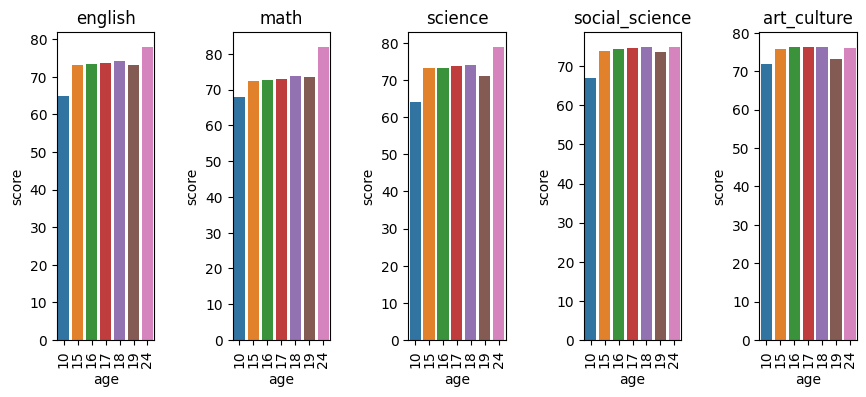

******************************************* gender ****************************************


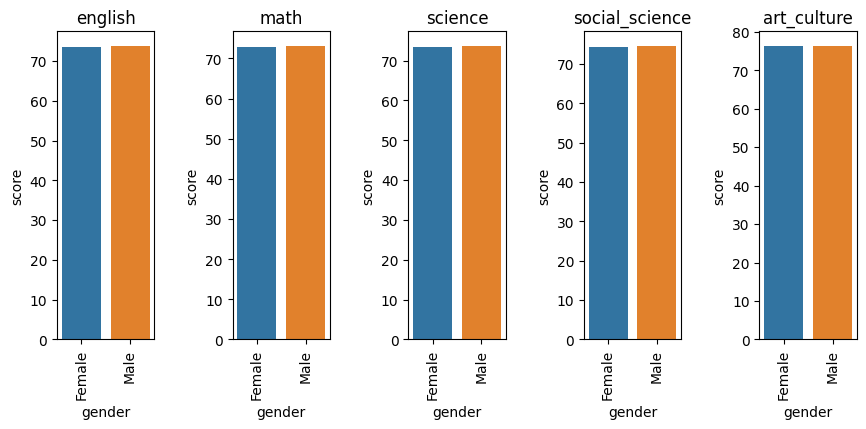

******************************************* location ****************************************


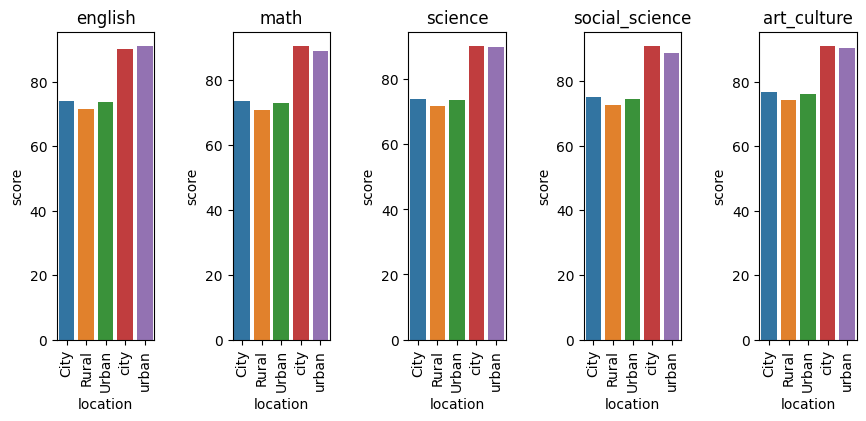

******************************************* stu_group ****************************************


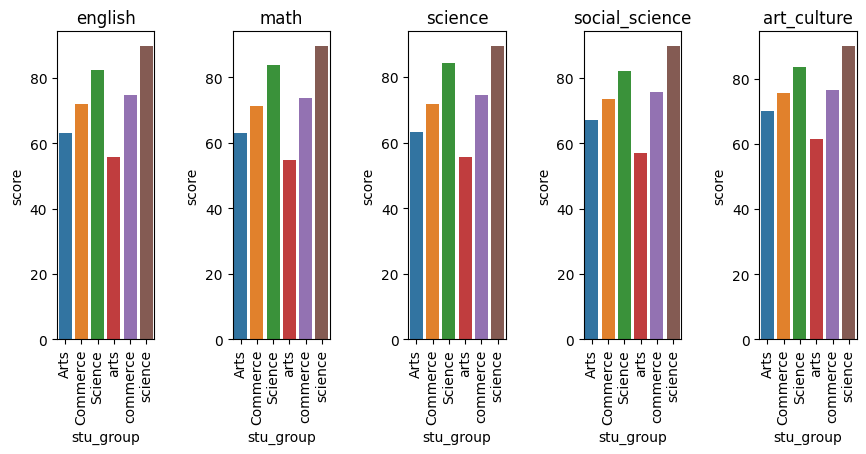

******************************************* family_size ****************************************


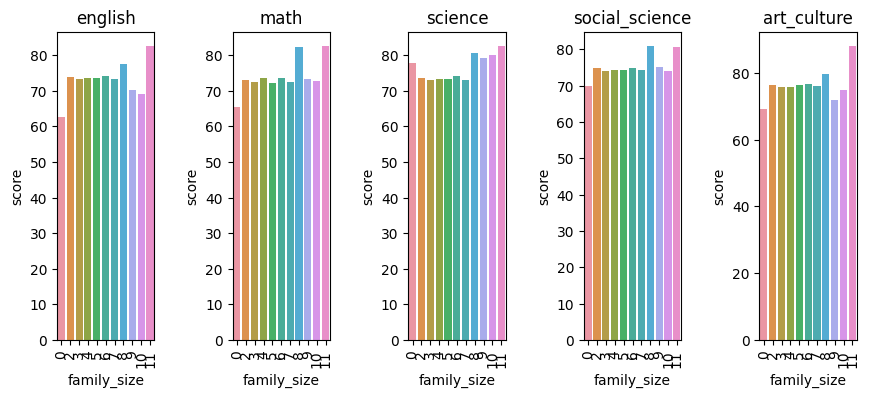

******************************************* mother_education ****************************************


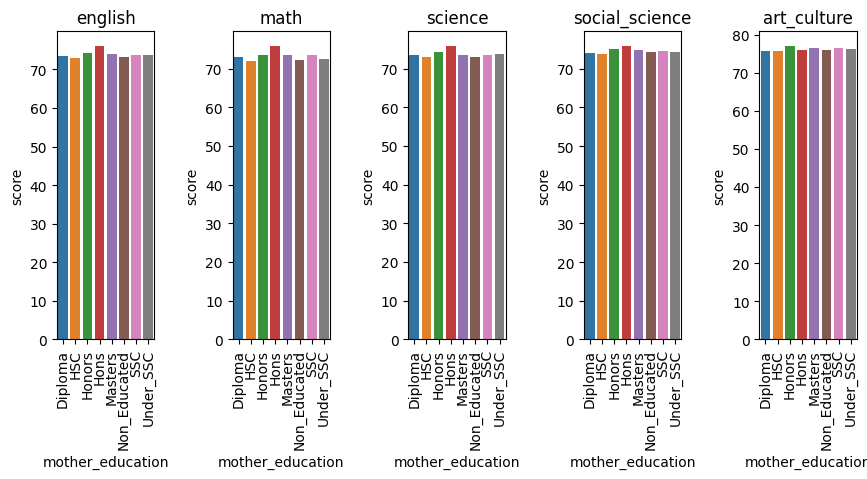

******************************************* father_education ****************************************


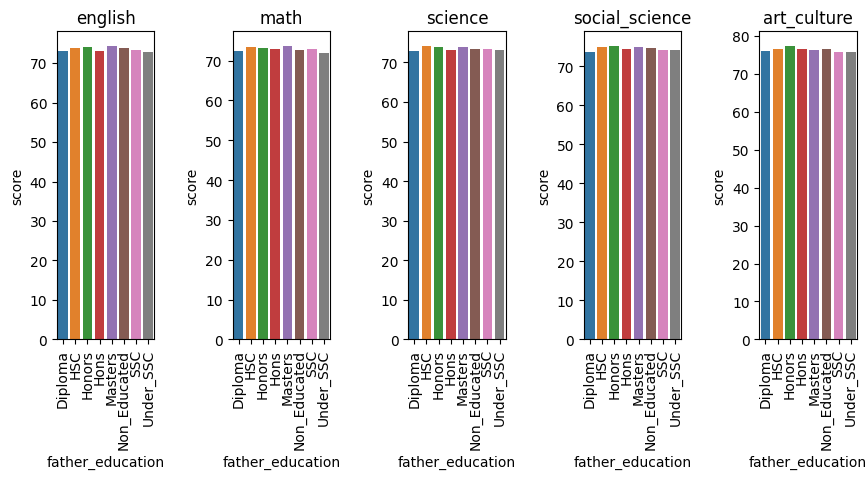

******************************************* mother_job ****************************************


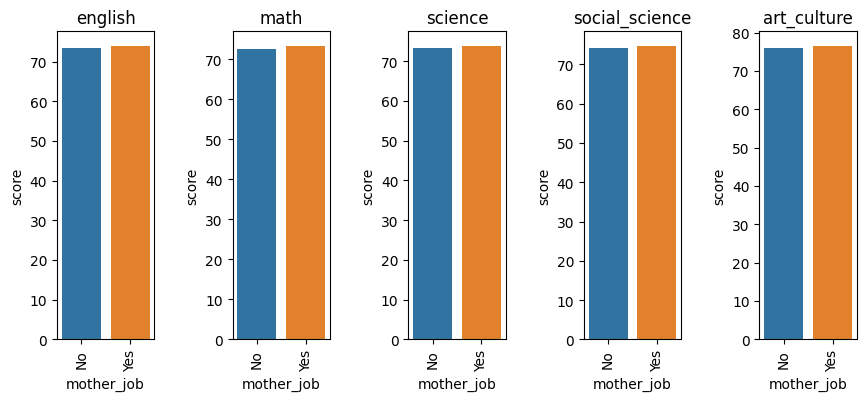

******************************************* father_job ****************************************


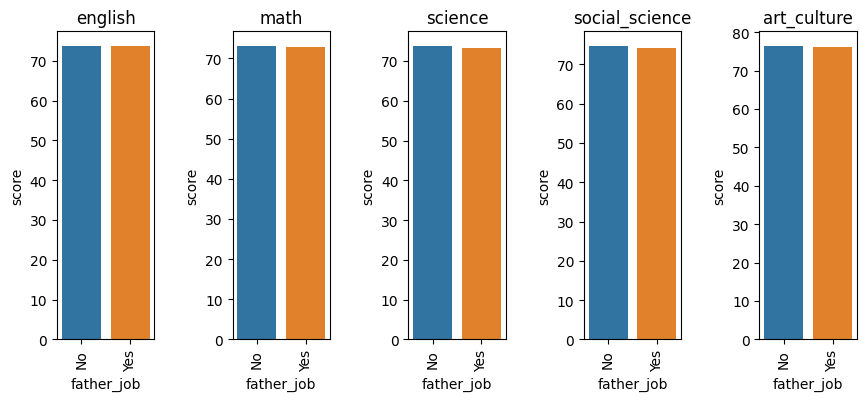

******************************************* guardian ****************************************


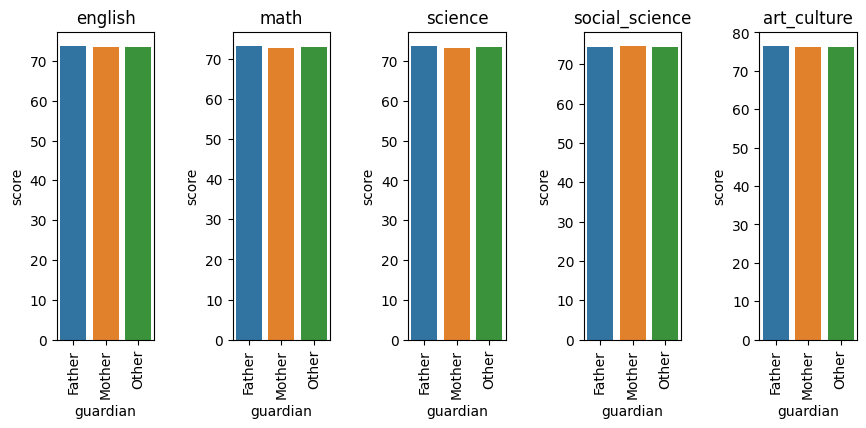

******************************************* parental_involvement ****************************************


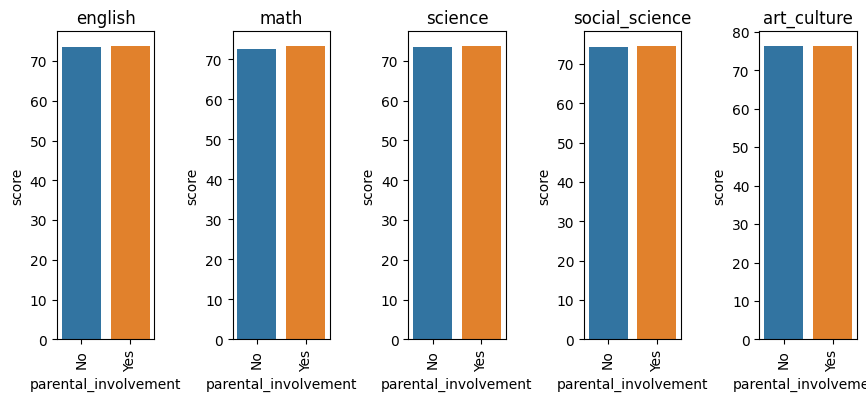

******************************************* internet_access ****************************************


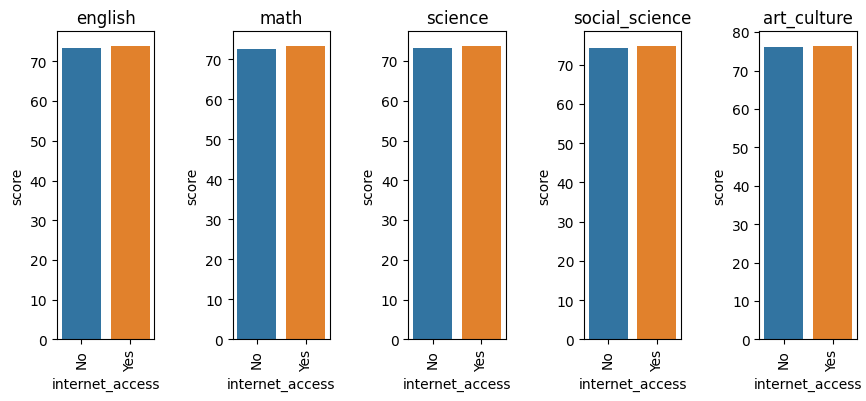

******************************************* studytime ****************************************


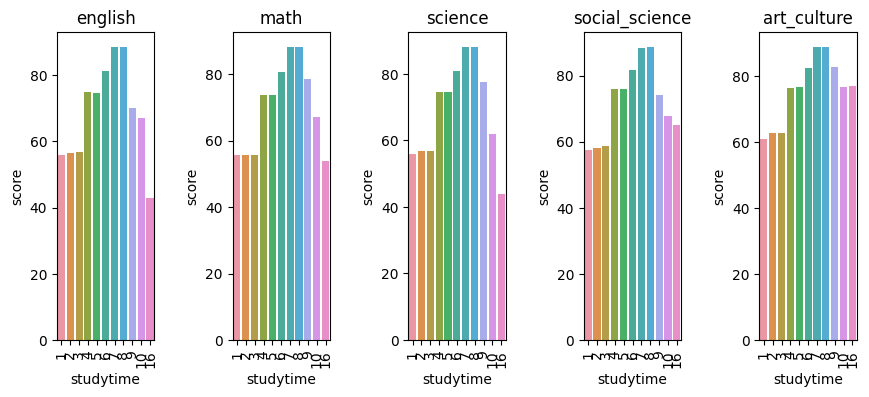

******************************************* tutoring ****************************************


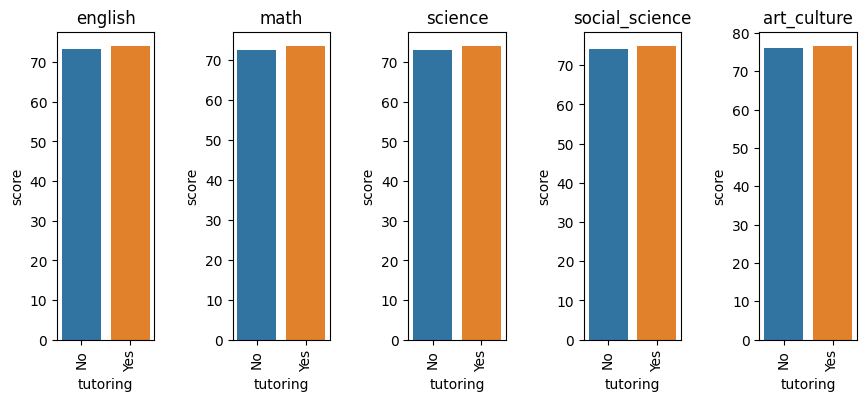

******************************************* school_type ****************************************


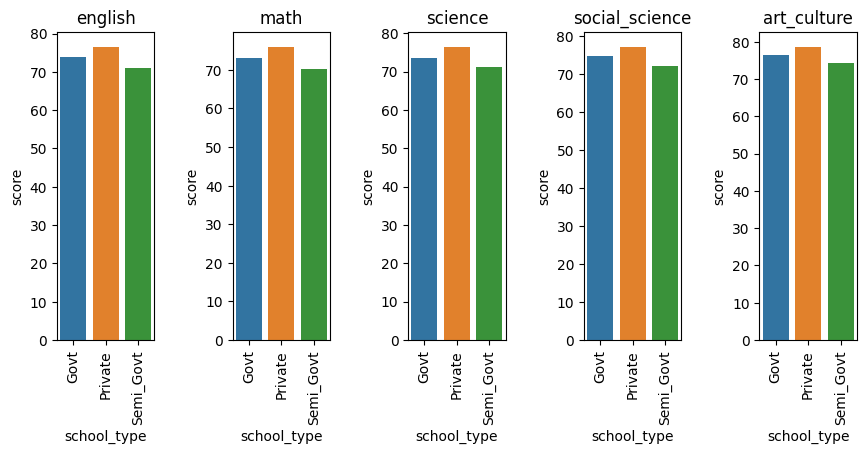

******************************************* extra_curricular_activities ****************************************


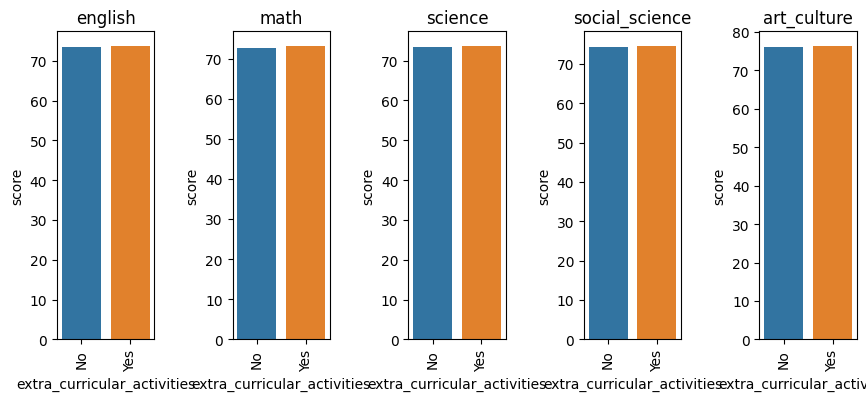

In [13]:
# Check performances by feature.

for i in cols:
    fig, ax = plt.subplots(figsize=(10, 4))
    fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.0)
    for idx in range(5):
        plt.subplot(1,5, idx+1)
        gender_df = df.groupby([i])[list(df.columns[-5:])[idx]].describe()
        sns.barplot(x = gender_df.index, y = gender_df.loc[:,"mean"].values)
        plt.ylabel("score")
        plt.xticks(rotation=90)
        plt.title(list(df.columns[-5:])[idx])
    print('*******************************************', i, '****************************************')
    
    plt.show()

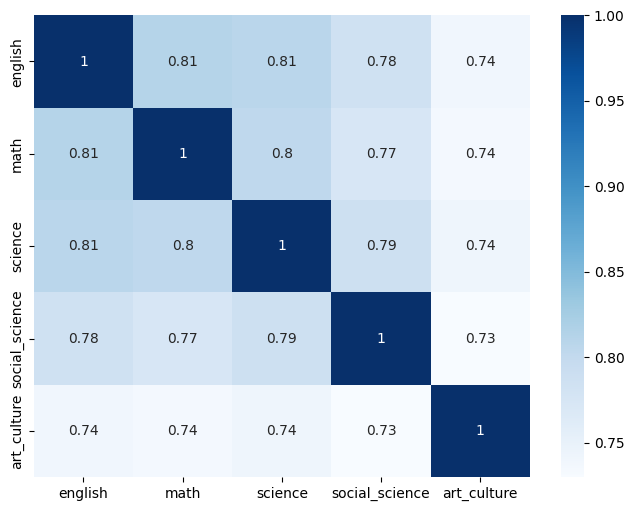

In [14]:
# Heatmap of performances
df_score = df[['english', 'math', 'science',
       'social_science', 'art_culture']]
plt.figure(figsize=(8,6))
sns.heatmap(df_score.corr(),annot=True, cmap='Blues');

# Model

In [15]:
# Delete unnecessary columns
df.drop(["id", "full_name", "attendance"], axis=1, inplace=True)

In [16]:
# Delete null data
df = df.dropna()

In [19]:
# Convert the columns to numeric.
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [20]:
df_final = df.copy()

In [21]:
# Downloading libraries for clustering
! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [22]:
scaled_X = df_final
scaled_X

,age,gender,location,stu_group,family_size,mother_education,father_education,mother_job,father_job,guardian,...,internet_access,studytime,tutoring,school_type,extra_curricular_activities,english,math,science,social_science,art_culture
0,16,1,2,2,6,6,1,0,0,0,...,1,8,1,1,1,95,98,92,94,98
1,18,0,1,1,6,6,1,0,1,0,...,0,4,0,2,0,65,71,40,78,80
2,15,1,1,1,4,6,6,1,1,0,...,1,5,1,0,1,64,78,58,86,74
3,16,1,1,2,6,6,6,1,1,0,...,1,7,1,1,1,84,90,85,86,88
4,17,1,2,1,5,2,4,0,1,0,...,1,4,1,2,1,54,70,45,79,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,17,0,0,5,5,1,5,0,0,1,...,1,7,0,0,1,81,83,80,84,91
8608,16,1,0,5,2,6,7,0,1,2,...,1,7,0,1,0,95,100,96,98,98
8609,18,1,0,3,3,0,6,0,0,2,...,1,1,1,1,0,45,59,41,51,69
8610,15,1,2,3,5,2,1,0,0,2,...,1,1,0,1,1,59,65,60,68,69


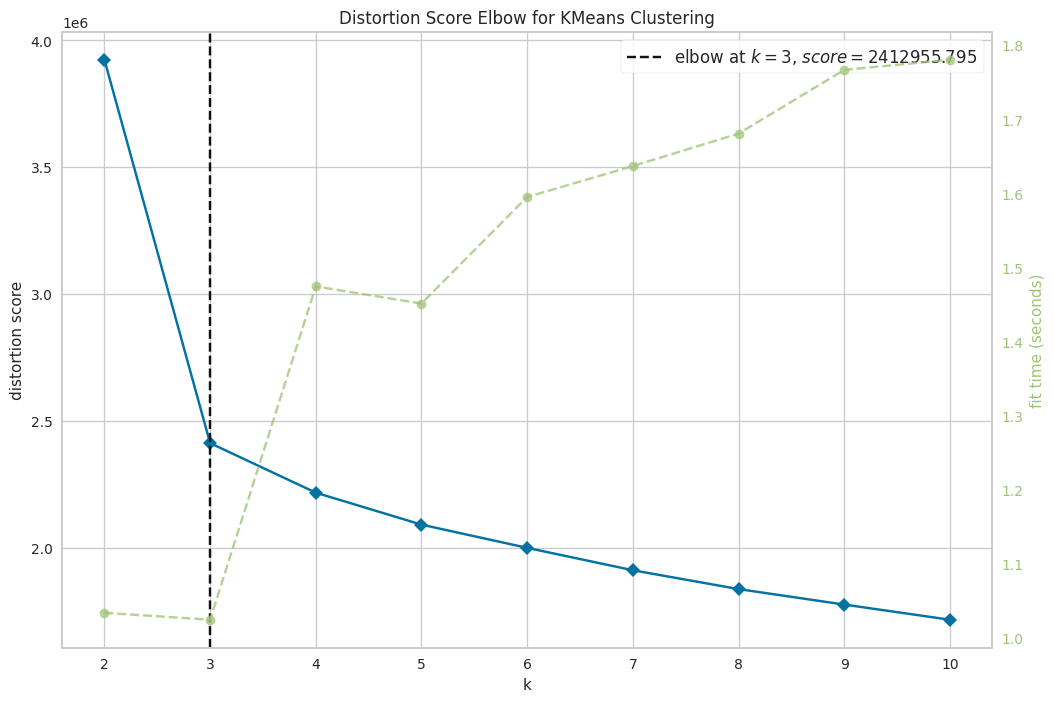

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Definition of the number of Folds - KElbowVisualizer
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(scaled_X)
elbow_graph.show()


In [24]:
# KMeans with 3 clusters

kmeans = KMeans(init = "k-means++", n_clusters = 3)
kmeans.fit_transform(df_final)
kmeans_label = kmeans.labels_
df["cluster"] = kmeans_label
df.head()

,age,gender,location,stu_group,family_size,mother_education,father_education,mother_job,father_job,guardian,...,studytime,tutoring,school_type,extra_curricular_activities,english,math,science,social_science,art_culture,cluster
0,16,1,2,2,6,6,1,0,0,0,...,8,1,1,1,95,98,92,94,98,2
1,18,0,1,1,6,6,1,0,1,0,...,4,0,2,0,65,71,40,78,80,0
2,15,1,1,1,4,6,6,1,1,0,...,5,1,0,1,64,78,58,86,74,0
3,16,1,1,2,6,6,6,1,1,0,...,7,1,1,1,84,90,85,86,88,2
4,17,1,2,1,5,2,4,0,1,0,...,4,1,2,1,54,70,45,79,76,1


In [25]:
# Checking the number of students in each cluster

freq = df['cluster'].value_counts() 
print(freq) 

cluster
0    3118
2    2801
1    2680
Name: count, dtype: int64


In [26]:
# Checking the scores of each cluster using "mean"
class_df = df.groupby("cluster")[df.columns[-6:-1]].mean()
class_df

,english,math,science,social_science,art_culture
cluster,,,,,
0,74.816228,73.711353,74.497755,75.816228,76.411482
1,55.394776,54.498881,55.743657,57.119030,61.736567
2,89.722242,89.744377,89.487326,89.599786,89.958586


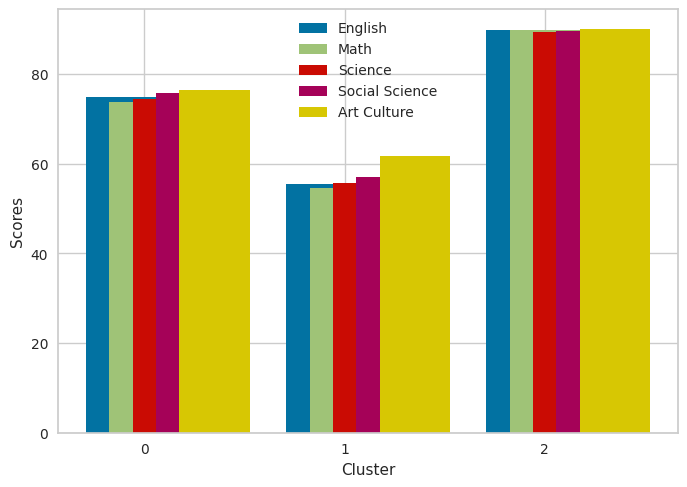

In [27]:
 #Bar chart with the scores for each cluster

ind = np.arange(3)
width = 0.35
fig, ax = plt.subplots()
#fig, ax = plt.subplots(figsize=(10, 4))
rects1 = ax.bar(ind - width/3, class_df.english, width, label='English')
rects2 = ax.bar(ind, class_df.math, width, label='Math')
rects3 = ax.bar(ind + width/3, class_df.science, width, label='Science')
rects4 = ax.bar(ind + width/1.5, class_df.social_science, width, label='Social Science')
rects5 = ax.bar(ind + width/1, class_df.art_culture, width, label='Art Culture')


ax.set_xlabel('Cluster')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [28]:
# Making an average score for each cluster

class_df["total_ave_score"] = (class_df.english + class_df.math + class_df.science + class_df.social_science + class_df.art_culture)/5
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Index([2, 0, 1], dtype='int32', name='cluster')

In [29]:
rank

cluster
2    89.702463
0    75.050609
1    56.898582
Name: total_ave_score, dtype: float64

In [30]:
# Adding the 'cluster' column to df_final
df_final['cluster'] = df['cluster']
df_final.head()

,age,gender,location,stu_group,family_size,mother_education,father_education,mother_job,father_job,guardian,...,studytime,tutoring,school_type,extra_curricular_activities,english,math,science,social_science,art_culture,cluster
0,16,1,2,2,6,6,1,0,0,0,...,8,1,1,1,95,98,92,94,98,2
1,18,0,1,1,6,6,1,0,1,0,...,4,0,2,0,65,71,40,78,80,0
2,15,1,1,1,4,6,6,1,1,0,...,5,1,0,1,64,78,58,86,74,0
3,16,1,1,2,6,6,6,1,1,0,...,7,1,1,1,84,90,85,86,88,2
4,17,1,2,1,5,2,4,0,1,0,...,4,1,2,1,54,70,45,79,76,1


In [31]:
# Create dataframe with only performance columns
df_cluster = df[['english', 'math', 'science', 'social_science', 'art_culture', 'cluster']]
df_cluster[['cluster']] = df_cluster[['cluster']].astype('str')

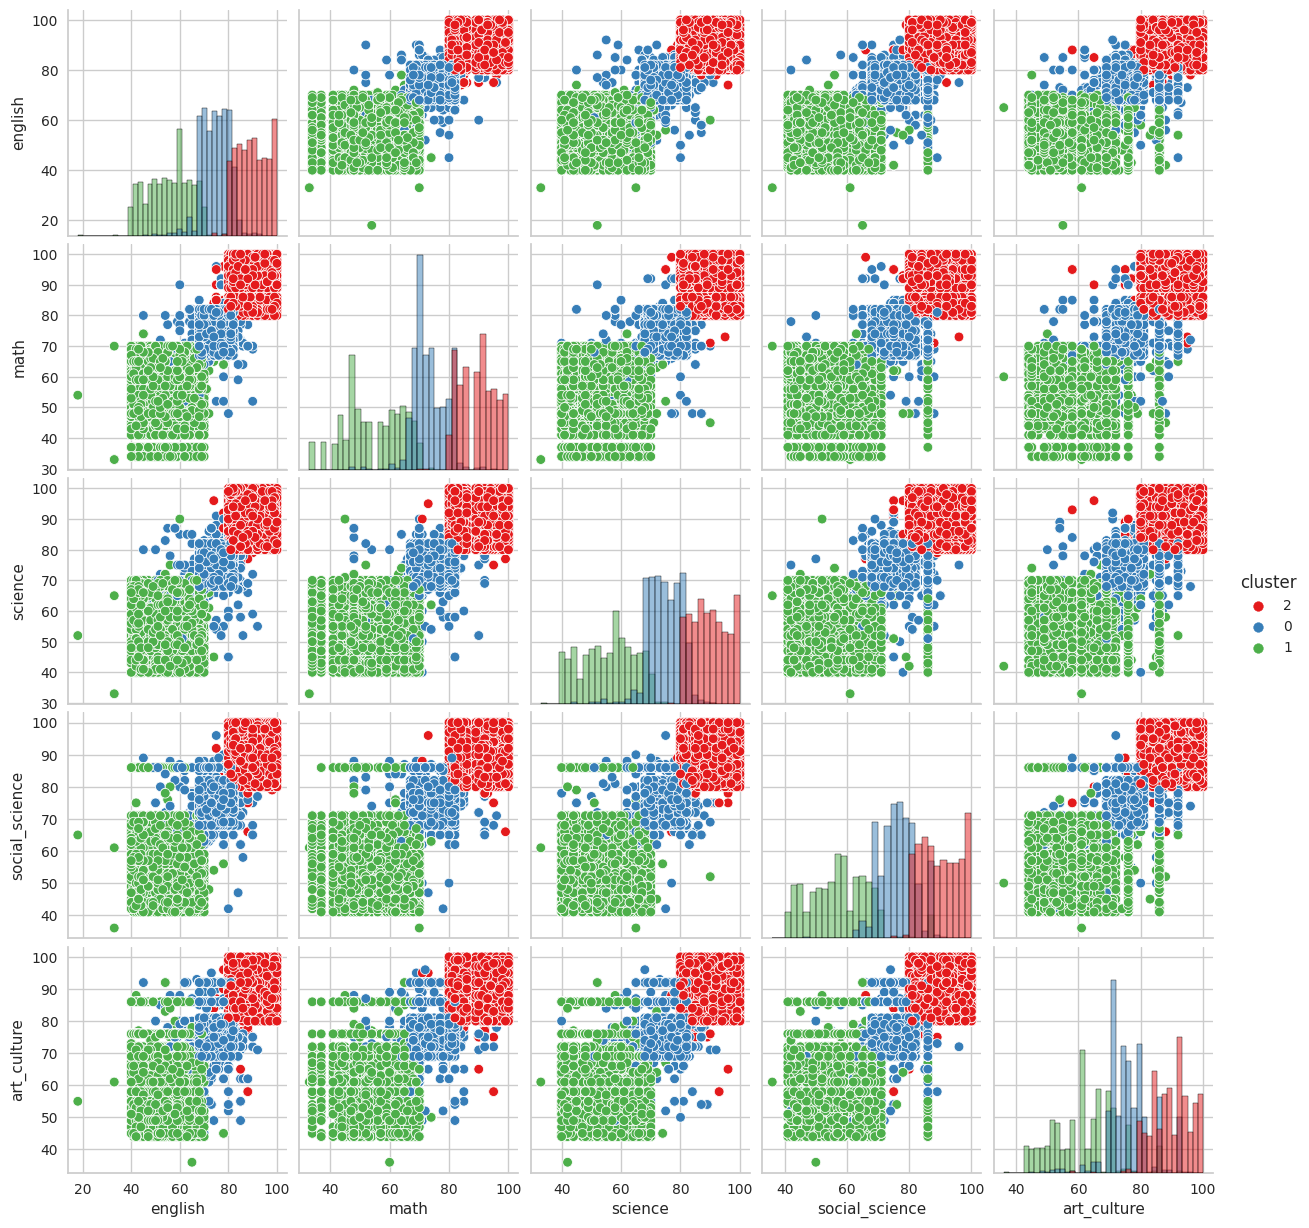

In [32]:
# Pairplot with histogram

sns.pairplot(df_cluster, hue="cluster", diag_kind="hist", palette="Set1")
plt.show()


In [34]:
df

,age,gender,location,stu_group,family_size,mother_education,father_education,mother_job,father_job,guardian,...,studytime,tutoring,school_type,extra_curricular_activities,english,math,science,social_science,art_culture,cluster
0,16,1,2,2,6,6,1,0,0,0,...,8,1,1,1,95,98,92,94,98,2
1,18,0,1,1,6,6,1,0,1,0,...,4,0,2,0,65,71,40,78,80,0
2,15,1,1,1,4,6,6,1,1,0,...,5,1,0,1,64,78,58,86,74,0
3,16,1,1,2,6,6,6,1,1,0,...,7,1,1,1,84,90,85,86,88,2
4,17,1,2,1,5,2,4,0,1,0,...,4,1,2,1,54,70,45,79,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,17,0,0,5,5,1,5,0,0,1,...,7,0,0,1,81,83,80,84,91,2
8608,16,1,0,5,2,6,7,0,1,2,...,7,0,1,0,95,100,96,98,98,2
8609,18,1,0,3,3,0,6,0,0,2,...,1,1,1,0,45,59,41,51,69,1
8610,15,1,2,3,5,2,1,0,0,2,...,1,0,1,1,59,65,60,68,69,1


In [35]:
df1

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,17,Female,City,5,HSC,Non_Educated,No,No,...,No,Govt,78,Yes,81,83,80,84,91,science
8608,8610,Sadiq Ghosh,16,Male,City,2,SSC,Under_SSC,No,Yes,...,No,Private,73,No,95,100,96,98,98,science
8609,8611,Arman Amin,18,Male,City,3,Diploma,SSC,No,No,...,Yes,Private,51,No,45,59,41,51,69,arts
8610,8612,Tawhidul Saif,15,Male,Urban,5,Honors,HSC,No,No,...,No,Private,66,Yes,59,65,60,68,69,arts


In [36]:
df1.drop('id', axis=1, inplace=True)


In [40]:
df1

,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,guardian,parental_involvement,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,16,Male,Urban,6,SSC,HSC,No,No,Father,Yes,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,18,Female,Rural,6,SSC,HSC,No,Yes,Father,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,15,Male,Rural,4,SSC,SSC,Yes,Yes,Father,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,16,Male,Rural,6,SSC,SSC,Yes,Yes,Father,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,17,Male,Urban,5,Honors,Masters,No,Yes,Father,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,17,Female,City,5,HSC,Non_Educated,No,No,Mother,No,...,No,Govt,78,Yes,81,83,80,84,91,science
8608,16,Male,City,2,SSC,Under_SSC,No,Yes,Other,No,...,No,Private,73,No,95,100,96,98,98,science
8609,18,Male,City,3,Diploma,SSC,No,No,Other,Yes,...,Yes,Private,51,No,45,59,41,51,69,arts
8610,15,Male,Urban,5,Honors,HSC,No,No,Other,Yes,...,No,Private,66,Yes,59,65,60,68,69,arts


In [41]:
# Convert the columns to numeric.
le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == type(object):
        df1[column] = le.fit_transform(df1[column])

In [42]:
df1

,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,guardian,parental_involvement,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,16,1,2,6,6,1,0,0,0,1,...,1,1,95,1,95,98,92,94,98,2
1,18,0,1,6,6,1,0,1,0,1,...,0,2,92,0,65,71,40,78,80,1
2,15,1,1,4,6,6,1,1,0,1,...,1,0,81,1,64,78,58,86,74,1
3,16,1,1,6,6,6,1,1,0,1,...,1,1,90,1,84,90,85,86,88,2
4,17,1,2,5,2,4,0,1,0,1,...,1,2,75,1,54,70,45,79,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,17,0,0,5,1,5,0,0,1,0,...,0,0,78,1,81,83,80,84,91,5
8608,16,1,0,2,6,7,0,1,2,0,...,0,1,73,0,95,100,96,98,98,5
8609,18,1,0,3,0,6,0,0,2,1,...,1,1,51,0,45,59,41,51,69,3
8610,15,1,2,5,2,1,0,0,2,1,...,0,1,66,1,59,65,60,68,69,3


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [43]:
# Features (X) and Target (y)
X = df.drop(['stu_group'], axis=1)  # Drop the 'stu_group' column which is the target
y = df['stu_group']  # The target variable is 'stu_group'

In [47]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature Scaling (important for SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')

print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, ROC-AUC: {roc_auc_dt}")


Decision Tree - Accuracy: 0.938953488372093, Precision: 0.9410216720717358, Recall: 0.938953488372093, F1 Score: 0.9397871880720979, ROC-AUC: 0.908595686803417


In [57]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1 Score: {f1_svm}, ROC-AUC: {roc_auc_svm}")


SVM - Accuracy: 0.9226744186046512, Precision: 0.9179401408633711, Recall: 0.9226744186046512, F1 Score: 0.9112379517036955, ROC-AUC: 0.9716785896784819


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"KNN - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}, ROC-AUC: {roc_auc_knn}")


KNN - Accuracy: 0.8982558139534884, Precision: 0.8951338961128085, Recall: 0.8982558139534884, F1 Score: 0.8950391960490646, ROC-AUC: 0.9253407886367052


In [62]:
df2 = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per.csv")

In [63]:
df2.drop('full_name', axis=1, inplace=True)

In [64]:
df2.drop('id', axis=1, inplace=True)

In [65]:
df2

,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,guardian,parental_involvement,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,16,Male,Urban,6,SSC,HSC,No,No,Father,Yes,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,18,Female,Rural,6,SSC,HSC,No,Yes,Father,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,15,Male,Rural,4,SSC,SSC,Yes,Yes,Father,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,16,Male,Rural,6,SSC,SSC,Yes,Yes,Father,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,17,Male,Urban,5,Honors,Masters,No,Yes,Father,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,17,Female,City,5,HSC,Non_Educated,No,No,Mother,No,...,No,Govt,78,Yes,81,83,80,84,91,science
8608,16,Male,City,2,SSC,Under_SSC,No,Yes,Other,No,...,No,Private,73,No,95,100,96,98,98,science
8609,18,Male,City,3,Diploma,SSC,No,No,Other,Yes,...,Yes,Private,51,No,45,59,41,51,69,arts
8610,15,Male,Urban,5,Honors,HSC,No,No,Other,Yes,...,No,Private,66,Yes,59,65,60,68,69,arts


In [67]:
df2.columns

Index(['age', 'gender', 'location', 'family_size', 'mother_education',
       'father_education', 'mother_job', 'father_job', 'guardian',
       'parental_involvement', 'internet_access', 'studytime', 'tutoring',
       'school_type', 'attendance', 'extra_curricular_activities', 'english',
       'math', 'science', 'social_science', 'art_culture', 'stu_group'],
      dtype='object')

Accuracy: 0.9640162507254788
Recall: 0.8347133112725867
F1 Score: 0.8813750794053076
Precision: 0.9505736244243131
ROC-AUC Score: 0.9943288855613831


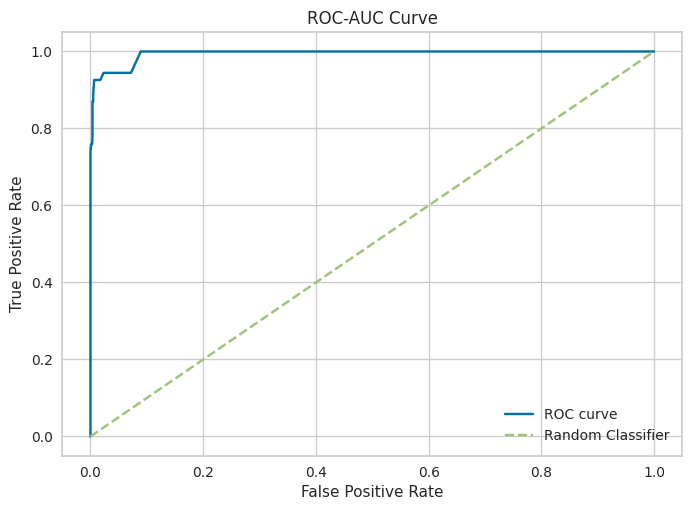

In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Encode categorical variables (using LabelEncoder for simplicity)
label_columns = ['age', 'gender', 'location', 'family_size', 'mother_education',
       'father_education', 'mother_job', 'father_job', 'guardian',
       'parental_involvement', 'internet_access', 'studytime', 'tutoring',
       'school_type', 'attendance', 'extra_curricular_activities', 'english',
       'math', 'science', 'social_science', 'art_culture', 'stu_group']  # Add other categorical columns here

encoder = LabelEncoder()
for col in label_columns:
    df2[col] = encoder.fit_transform(df2[col].astype(str))

# Separate features and target variable
X = df2.drop('stu_group', axis=1)  # Assuming 'stu_group' is the target variable
y = df2['stu_group']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # Adjust the average parameter as needed
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"ROC-AUC Score: {roc_auc}")

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()


# If you liked my notebook please upvote me.